In [2]:
import numpy as np
import matplotlib.pyplot as plt 


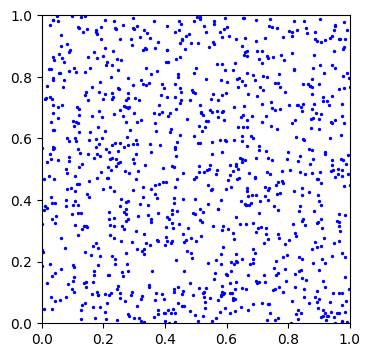

In [10]:
'''White noise sampling'''

def white_noise_sampling(num_points, domain_size):
    points = np.random.uniform(0, domain_size, size=(num_points, 2))
    return points

# Sample 1000 surfels in a 2D domain of size 1x1
points = white_noise_sampling(1000, 1)

# Plot the result
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(points[:, 0], points[:, 1], s=2, c='b')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()

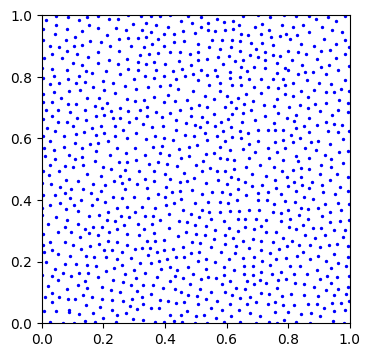

In [8]:
'''Blue noise sampling'''

def blue_noise_sampling(num_points, domain_size):
    # Generate the first 10 points randomly
    points = np.random.uniform(0, domain_size, size=(100, 2))
    
    # Keep adding new points until we have enough
    while len(points) < num_points:
        # Generate 10 candidate points randomly
        candidates = np.random.uniform(0, domain_size, size=(100, 2))
        
        # Compute the minimum distance to any existing point for each candidate
        distances = np.min(np.linalg.norm(points - candidates[:, np.newaxis], axis=2), axis=1)
        
        # Add the candidate with the maximum minimum distance to the point set
        points = np.concatenate([points, candidates[np.argmax(distances), np.newaxis]])
    
    return points

# Sample 1000 surfels in a 2D domain of size 1x1
points = blue_noise_sampling(1000, 1)

# Plot the result
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(points[:, 0], points[:, 1], s=2, c='b')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()

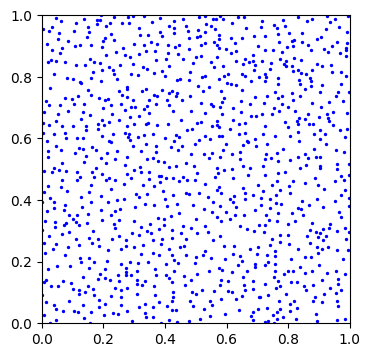

In [4]:
'''Red noise sampling'''


def red_noise_sampling(num_points, domain_size):
    # Generate the first 10 points randomly
    points = np.random.uniform(0, domain_size, size=(100, 2))

    # Keep adding new points until we have enough
    while len(points) < num_points:
        # Generate 10 candidate points randomly
        candidates = np.random.uniform(0, domain_size, size=(100, 2))

        # Compute the minimum distance to any existing point for each candidate
        distances = np.min(np.linalg.norm(points - candidates[:, np.newaxis], axis=2), axis=1)

        # Compute the normalized minimum distances
        normalized_distances = distances / np.max(distances)

        # Compute the probability of selecting each candidate point
        probabilities = normalized_distances ** 2
        probabilities /= np.sum(probabilities)

        # Add a candidate point with probability proportional to its distance to existing points
        new_point = candidates[np.random.choice(len(candidates), p=probabilities)]
        points = np.concatenate([points, new_point[np.newaxis]])

    return points

# Sample 1000 surfels in a 2D domain of size 1x1
points = red_noise_sampling(1000, 1)

# Plot the result
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(points[:, 0], points[:, 1], s=2, c='b')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()


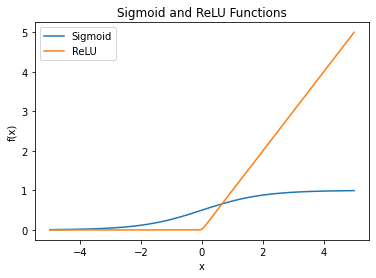

In [3]:
'''Sigmoid and ReLU functions'''


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# Generate x values
x = np.linspace(-5, 5, 100)

# Compute y values for sigmoid and ReLU functions
y_sigmoid = sigmoid(x)
y_relu = relu(x)

# Plotting the functions
plt.plot(x, y_sigmoid, label='Sigmoid')
plt.plot(x, y_relu, label='ReLU')

# Set plot title and labels
plt.title('Sigmoid and ReLU Functions')
plt.xlabel('x')
plt.ylabel('f(x)')

# Set legend
plt.legend()

# Display the plot
plt.show()